# Simple MNIST classification using Keras
## Content
1. Load data
2. Build model
3. Training model
4. Evaluate model

In [12]:
import numpy as np
import keras
from keras import layers

# 1. Load data

In [13]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 2. Build model

In [15]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

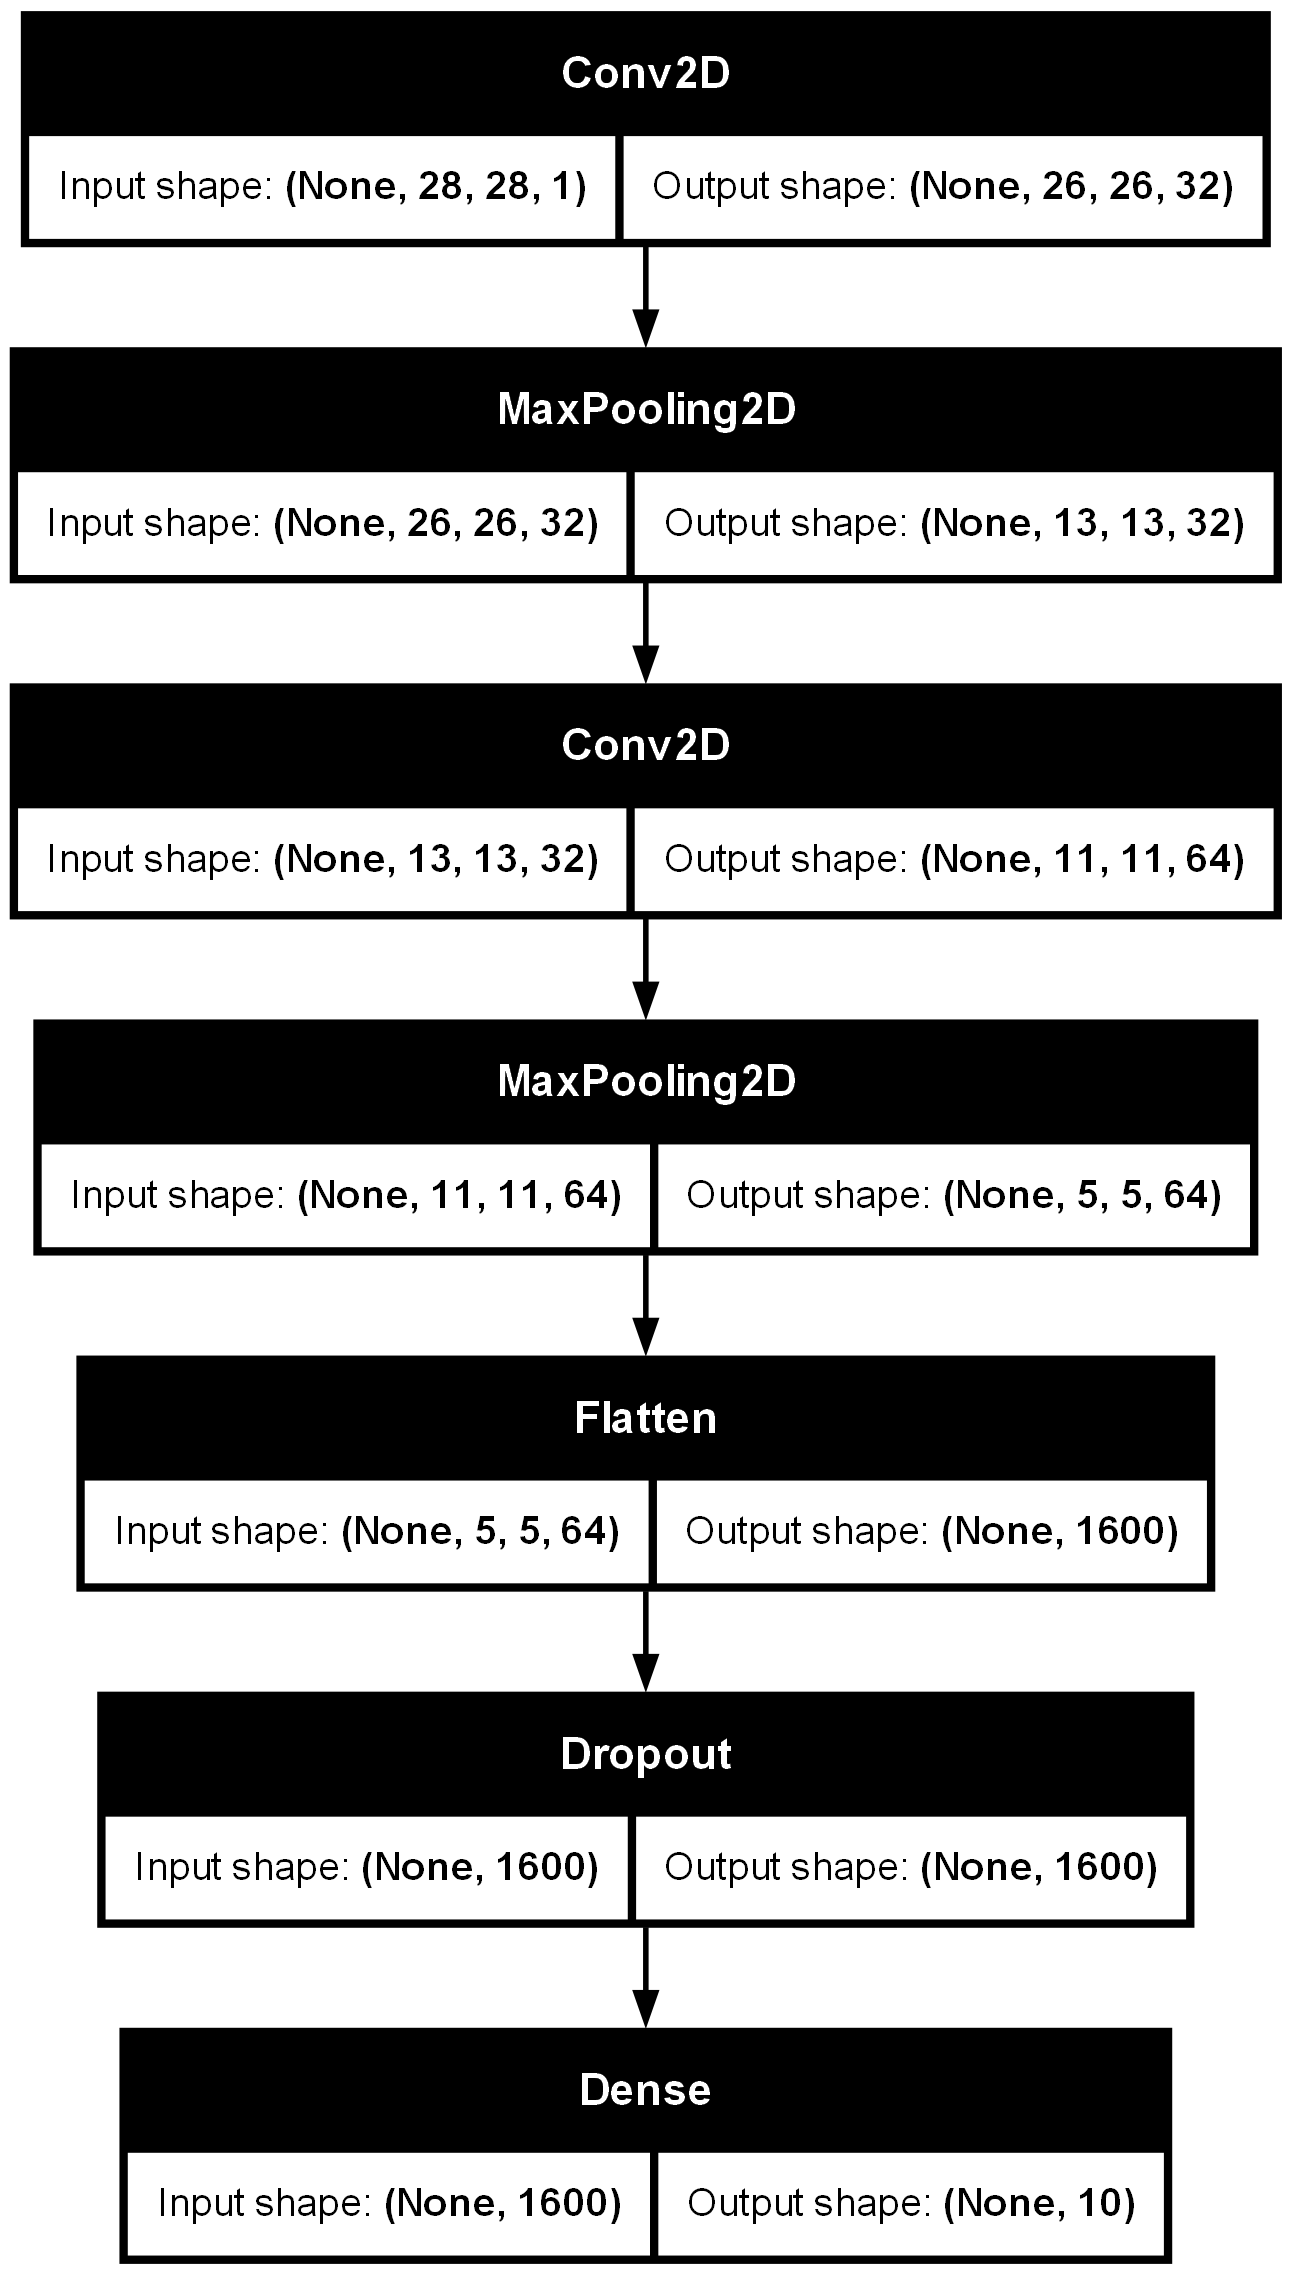

In [16]:
keras.utils.plot_model(model, to_file='Simple_MNIST_Convnet_model.png', show_shapes=True)

# 3. Training model

In [10]:
# Parameters
batch_size = 128
epochs = 10

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 150ms/step - accuracy: 0.8008 - loss: 0.6994 - val_accuracy: 0.9810 - val_loss: 0.0727
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 65s 153ms/step - accuracy: 0.9683 - loss: 0.1040 - val_accuracy: 0.9858 - val_loss: 0.0537
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 63s 150ms/step - accuracy: 0.9793 - loss: 0.0674 - val_accuracy: 0.9883 - val_loss: 0.0444
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 140ms/step - accuracy: 0.9818 - loss: 0.0597 - val_accuracy: 0.9885 - val_loss: 0.0398
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 142ms/step - accuracy: 0.9842 - loss: 0.0503 - val_accuracy: 0.9910 - val_loss: 0.0360
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 63s 150ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9910 - val_loss: 0.0365
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 68s 161ms/step - accuracy: 0.9863 - loss: 0.0419 - val_accuracy: 0.9915 - val_loss: 0.0325
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 166ms/step - accuracy: 0.9889 - loss: 0

# 4. Evaluation model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027570374310016632
Test accuracy: 0.9896000027656555
